Chatbot - MindFull

Instalação das Bibliotecas


In [1]:
!pip install joblib pandas scikit-learn flask numpy

**Etapa 1: Baixa e instala o executável do Cloudflare Tunnel**

In [12]:
# 1. Download Garantido (o -O força o nome do arquivo)
!wget -O cloudflared-linux-amd64 https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64

# 2. Permissão de Execução
!chmod +x cloudflared-linux-amd64

# 3. Movimentação/Instalação para o diretório de sistema
!mv cloudflared-linux-amd64 /usr/local/bin/cloudflared

# --- Verificação ---
print("\nVerificação de Caminho:")

# Este comando DEVE retornar o caminho /usr/local/bin/cloudflared
!which cloudflared

print("\nCloudflared configurado com sucesso! Agora execute a Célula 6.")

--2025-11-22 18:04:54--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2025.11.1/cloudflared-linux-amd64 [following]
--2025-11-22 18:04:54--  https://github.com/cloudflare/cloudflared/releases/download/2025.11.1/cloudflared-linux-amd64
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/955e9d1b-ac5e-4188-8867-e5f53958a8fe?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-11-22T18%3A57%3A26Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-11-22

**Etapa 2: Criação e Geração dos Dados (.csv)**

In [20]:

import pandas as pd
import numpy as np

# Configurações de simulação
N_SAMPLES = 500
np.random.seed(42)

# Criação das Features
df = pd.DataFrame({
    'ID_USUARIO': np.random.randint(1, 51, N_SAMPLES),
    'PONTOS_XP': np.random.randint(100, 5000, N_SAMPLES),
    'COMP_MEDIDA_ONTEM': np.random.rand(N_SAMPLES).round(2),
    'MED_ESTRESSE_3_DIAS': np.clip(np.random.normal(3, 1, N_SAMPLES), 1, 5).round(2),
})

# Criação das variáveis Dummies para Setor
df['SETOR'] = np.random.choice(['TI', 'RH', 'FINANCEIRO', 'VENDAS'], N_SAMPLES)
dummies = pd.get_dummies(df['SETOR'], prefix='SETOR', drop_first=False)
df = pd.concat([df.drop('SETOR', axis=1), dummies], axis=1)

# Simulação dos Targets (Valores a serem preditos)
df['NR_NIVEL_ESTRESSE'] = np.clip(df['MED_ESTRESSE_3_DIAS'] + np.random.uniform(-1, 1, N_SAMPLES), 1, 5).round().astype(int)
df['NR_NIVEL_HUMOR'] = np.clip(5 - df['NR_NIVEL_ESTRESSE'] + (df['PONTOS_XP'] / 5000) * 2 + np.random.uniform(-0.5, 0.5, N_SAMPLES), 1, 5).round().astype(int)

# Salvar o arquivo CSV
df.to_csv('mindfull_data.csv', index=False)
print("Arquivo 'mindfull_data.csv' criado e salvo.")


Arquivo 'mindfull_data.csv' criado e salvo.


**Etapa 2.1: Célula de Análise Exploratória de Dados (EDA)**

/tmp/ipython-input-3072171241.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NR_NIVEL_ESTRESSE', data=df_analise, palette='Reds')
/tmp/ipython-input-3072171241.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SETOR_ORIGINAL', y='NR_NIVEL_ESTRESSE', data=df_analise, palette='Pastel1')


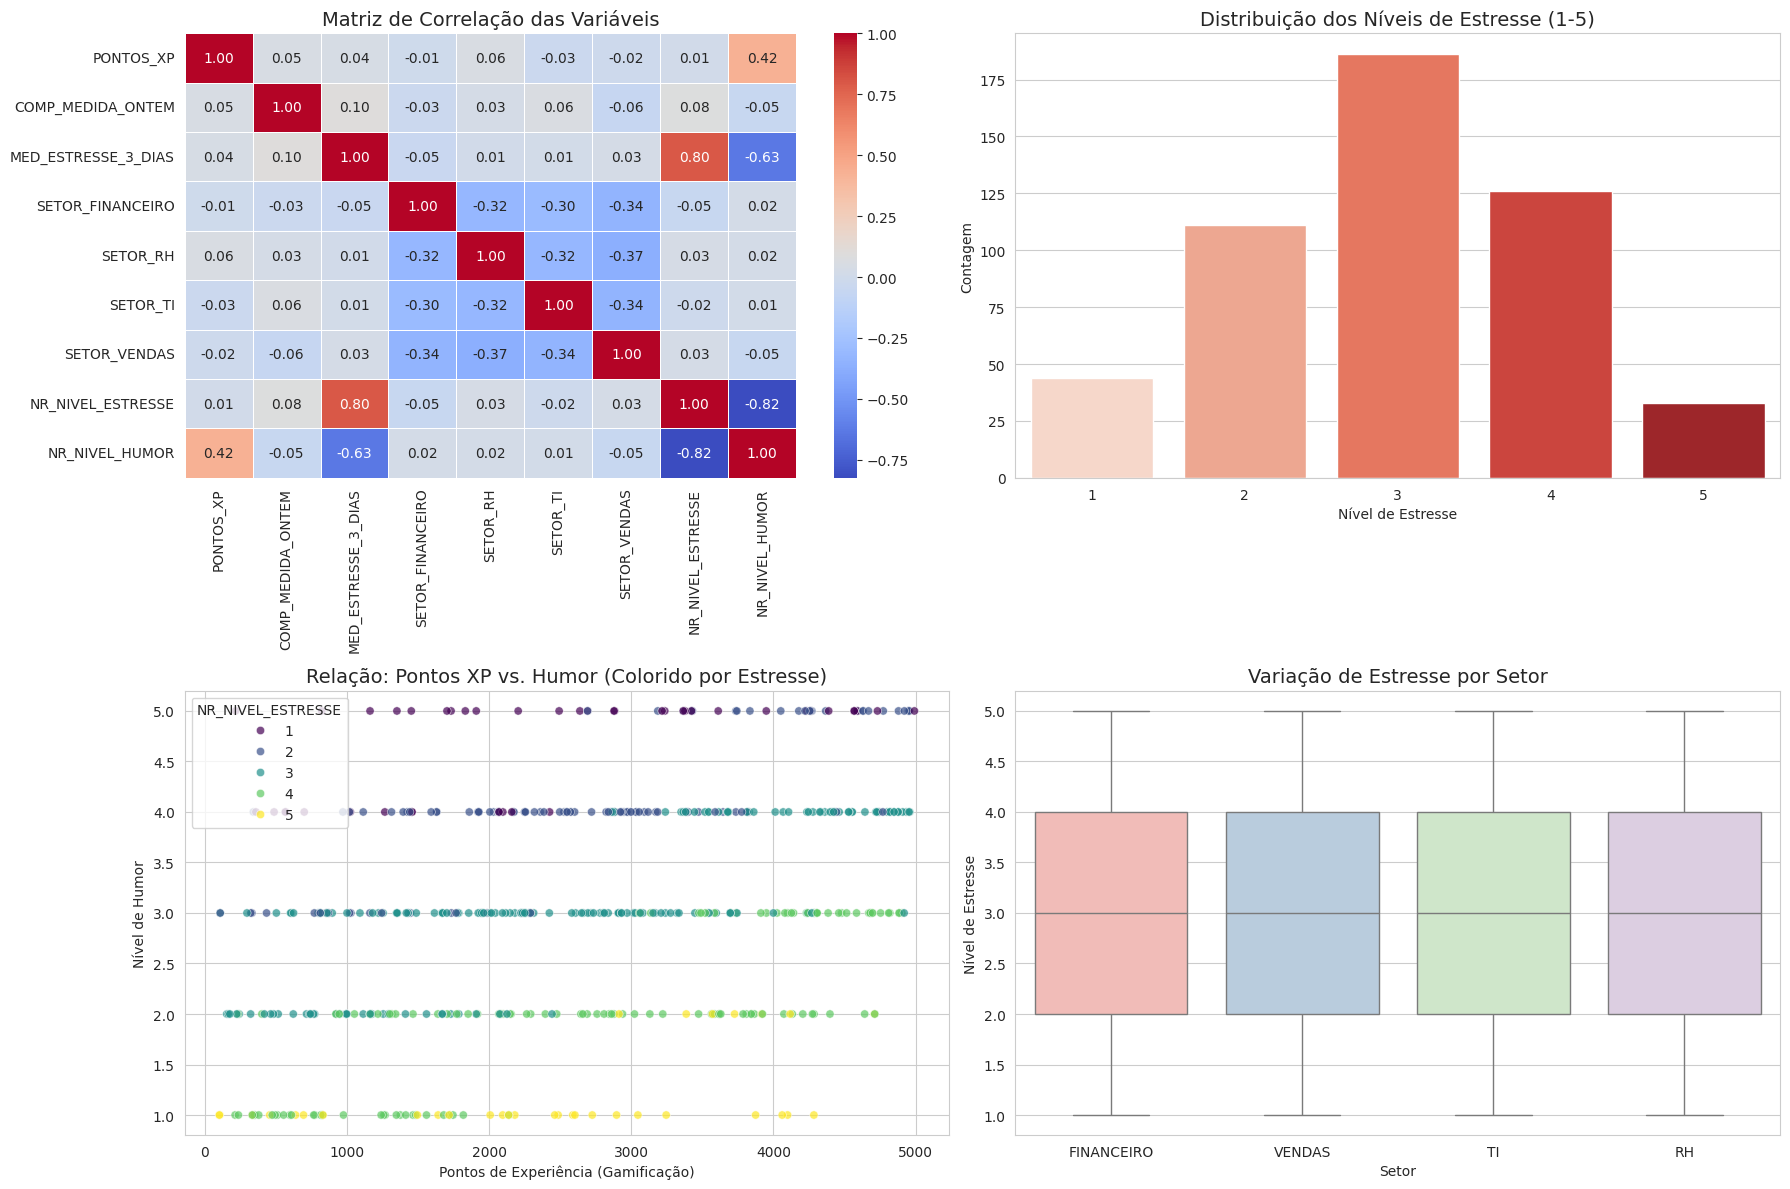


--- INSIGHTS PRELIMINARES ---
1. Correlação: Verifique se 'NR_NIVEL_ESTRESSE' tem correlação negativa forte com 'NR_NIVEL_HUMOR'.
2. Balanceamento: O gráfico de contagem mostra se temos dados suficientes para todas as classes de estresse.
3. Resumo Estatístico:

       PONTOS_XP  NR_NIVEL_ESTRESSE  NR_NIVEL_HUMOR
count     500.00             500.00          500.00
mean     2623.79               2.99            3.06
std      1381.55               1.04            1.17
min       103.00               1.00            1.00
25%      1456.75               2.00            2.00
50%      2648.50               3.00            3.00
75%      3779.50               4.00            4.00
max      4992.00               5.00            5.00


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Carregar os dados gerados
df_analise = pd.read_csv('mindfull_data.csv')

# Configuração de estilo visual
sns.set_style("whitegrid")
plt.figure(figsize=(18, 12))

# 1. Mapa de Calor de Correlação (Para entender quais variáveis impactam o alvo)
plt.subplot(2, 2, 1)
# Removemos ID_USUARIO pois não é relevante para correlação
cols_corr = [c for c in df_analise.columns if c != 'ID_USUARIO']
corr_matrix = df_analise[cols_corr].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis', fontsize=14)

# 2. Distribuição do Nível de Estresse (Target Classificação)
plt.subplot(2, 2, 2)
sns.countplot(x='NR_NIVEL_ESTRESSE', data=df_analise, palette='Reds')
plt.title('Distribuição dos Níveis de Estresse (1-5)', fontsize=14)
plt.xlabel('Nível de Estresse')
plt.ylabel('Contagem')

# 3. Relação entre Pontos XP e Humor (Business Insight)
# Hipótese: Mais engajamento (XP) leva a melhor humor?
plt.subplot(2, 2, 3)
sns.scatterplot(x='PONTOS_XP', y='NR_NIVEL_HUMOR', data=df_analise, hue='NR_NIVEL_ESTRESSE', palette='viridis', alpha=0.7)
plt.title('Relação: Pontos XP vs. Humor (Colorido por Estresse)', fontsize=14)
plt.xlabel('Pontos de Experiência (Gamificação)')
plt.ylabel('Nível de Humor')

# 4. Boxplot: Estresse por Setor (Identificar áreas críticas)
# Precisamos reverter os dummies para uma coluna categórica 'SETOR' para o gráfico
cols_setor = [c for c in df_analise.columns if c.startswith('SETOR_')]
df_analise['SETOR_ORIGINAL'] = df_analise[cols_setor].idxmax(axis=1).apply(lambda x: x.replace('SETOR_', ''))

plt.subplot(2, 2, 4)
sns.boxplot(x='SETOR_ORIGINAL', y='NR_NIVEL_ESTRESSE', data=df_analise, palette='Pastel1')
plt.title('Variação de Estresse por Setor', fontsize=14)
plt.xlabel('Setor')
plt.ylabel('Nível de Estresse')

plt.tight_layout()
plt.show()

print("\n--- INSIGHTS PRELIMINARES ---")
print("1. Correlação: Verifique se 'NR_NIVEL_ESTRESSE' tem correlação negativa forte com 'NR_NIVEL_HUMOR'.")
print("2. Balanceamento: O gráfico de contagem mostra se temos dados suficientes para todas as classes de estresse.")
print(f"3. Resumo Estatístico:\n")
print(df_analise[['PONTOS_XP', 'NR_NIVEL_ESTRESSE', 'NR_NIVEL_HUMOR']].describe().round(2))

**Etapa 3: Desenvolvimento do Modelo de Classificação (Notebook 1)**

In [16]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import joblib

# 1. Preparação dos Dados
df = pd.read_csv('mindfull_data.csv')
# Target para Classificação: 1 se Estresse > 3 (Risco Alto), 0 caso contrário
df['Risco_Estresse_Alto'] = (df['NR_NIVEL_ESTRESSE'] > 3).astype(int)

# Features (usadas na API)
features = [col for col in df.columns if col not in ['ID_USUARIO', 'NR_NIVEL_ESTRESSE', 'NR_NIVEL_HUMOR', 'Risco_Estresse_Alto', 'SETOR']]
X = df[features]
y = df['Risco_Estresse_Alto']

# 2. Treinamento
scaler_stress = StandardScaler()
X_scaled = scaler_stress.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_clf = LogisticRegression()
model_clf.fit(X_train, y_train)

# 3. Avaliação de Desempenho
y_pred = model_clf.predict(X_test)
print(f"--- Classificação de Risco de Estresse ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# 4. Persistência (Modelos Pré-Treinados)
joblib.dump(model_clf, 'model_stress_classifier.joblib')
joblib.dump(scaler_stress, 'scaler_stress.joblib')
print("[SUCESSO]: Classificador e Scaler salvos para uso na API.")

--- Classificação de Risco de Estresse ---
Acurácia: 0.8000
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        71
           1       0.67      0.62      0.64        29

    accuracy                           0.80       100
   macro avg       0.76      0.75      0.75       100
weighted avg       0.80      0.80      0.80       100

[SUCESSO]: Classificador e Scaler salvos para uso na API.


**Etapa 4: Desenvolvimento do Modelo de Regressão (Notebook 2)**

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# 1. Preparação dos Dados
df = pd.read_csv('mindfull_data.csv')

# Features (as mesmas do Classificador)
features = [col for col in df.columns if col not in ['ID_USUARIO', 'NR_NIVEL_ESTRESSE', 'NR_NIVEL_HUMOR', 'SETOR']]
X = df[features]
y = df['NR_NIVEL_HUMOR'] # Target: Nível de Humor (1 a 5)

# 2. Treinamento
scaler_mood = StandardScaler()
X_scaled = scaler_mood.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

# 3. Avaliação de Desempenho
y_pred = model_reg.predict(X_test)
print(f"\n--- Regressão do Nível de Humor ---")
print(f"Erro Quadrático Médio (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"R-Squared (Coef. Determinação): {r2_score(y_test, y_pred):.4f}")

# 4. Persistência (Modelos Pré-Treinados)
joblib.dump(model_reg, 'model_mood_regressor.joblib')
joblib.dump(scaler_mood, 'scaler_mood.joblib')
print("[SUCESSO]: Regressor e Scaler salvos para uso na API.")



--- Regressão do Nível de Humor ---
Erro Quadrático Médio (MSE): 0.5830
R-Squared (Coef. Determinação): 0.5651
[SUCESSO]: Regressor e Scaler salvos para uso na API.


***Etapa 5: Criação do Código da API REST (Flask)***

In [18]:

%%writefile api.py

from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)

# A lista de features deve ser idêntica à usada no treinamento
FEATURES = ['PONTOS_XP', 'COMP_MEDIDA_ONTEM', 'MED_ESTRESSE_3_DIAS', 'SETOR_TI', 'SETOR_RH', 'SETOR_FINANCEIRO', 'SETOR_VENDAS']

# --- CARREGAR MODELOS PRÉ-TREINADOS ---
try:
    classifier = joblib.load('model_stress_classifier.joblib')
    scaler_stress = joblib.load('scaler_stress.joblib')
    regressor = joblib.load('model_mood_regressor.joblib')
    scaler_mood = joblib.load('scaler_mood.joblib')
    print("Modelos carregados com sucesso!")
except Exception as e:
    print(f"ERRO ao carregar modelos: {e}. Execute as Etapas 3 e 4.")
    classifier = None
    regressor = None

# --- ENDPOINT 1: CLASSIFICAÇÃO DE RISCO DE ESTRESSE ---
@app.route('/predict_stress', methods=['POST'])
def predict_stress():
    if classifier is None: return jsonify({"error": "Modelo de Classificação não carregado."}), 500
    try:
        data = request.get_json(force=True)

        # 1. Converte JSON para array de features
        input_data = np.array([[data.get(f, 0) for f in FEATURES]])

        # 2. Padroniza (CRUCIAL!)
        input_scaled = scaler_stress.transform(input_data)

        # 3. Prediz a probabilidade de Risco Alto (classe 1)
        prediction_proba = classifier.predict_proba(input_scaled)[0][1]

        return jsonify({
            'status': 'success',
            'risco_estresse_alto_proba': f"{prediction_proba:.4f}",
            'mensagem': 'Intervenção Proativa Recomendada' if prediction_proba > 0.5 else 'Risco Baixo'
        })
    except Exception as e:
        return jsonify({'error': str(e), 'message': 'Erro ao processar dados de classificação.'}), 400


# --- ENDPOINT 2: REGRESSÃO DO NÍVEL DE HUMOR ---
@app.route('/predict_mood', methods=['POST'])
def predict_mood():
    if regressor is None: return jsonify({"error": "Modelo de Regressão não carregado."}), 500
    try:
        data = request.get_json(force=True)

        # 1. Converte JSON para array de features
        input_data = np.array([[data.get(f, 0) for f in FEATURES]])

        # 2. Padroniza (CRUCIAL!)
        input_scaled = scaler_mood.transform(input_data)

        # 3. Prediz e limita entre 1 e 5
        predicted_mood = regressor.predict(input_scaled)[0]
        predicted_mood_safe = int(np.clip(round(predicted_mood), 1, 5))

        return jsonify({
            'status': 'success',
            'humor_predito_dia_seguinte': predicted_mood_safe,
            'mensagem': 'Predição de humor concluída para personalização.'
        })

    except Exception as e:
        return jsonify({'error': str(e), 'message': 'Erro ao processar dados de regressão.'}), 400

if __name__ == '__main__':
    # Flask usa a porta 5000 por padrão
    app.run(host='0.0.0.0', port=5000, debug=False)


Overwriting api.py


**Etapa 6: Execução da API e Exposição com Cloudflare**

In [21]:
import subprocess
import time
import re

# --- 1. LIMPEZA E INÍCIO DO FLASK EM BACKGROUND ---
print("Limpando processos antigos e iniciando Flask em background...")
try:
    subprocess.run(['pkill', '-f', 'api.py'], check=False, stderr=subprocess.DEVNULL)
    subprocess.run(['pkill', '-f', 'cloudflared'], check=False, stderr=subprocess.DEVNULL)
    time.sleep(1)
except:
    pass

# Usa o nohup & para iniciar o servidor Flask em background (essencial!)
subprocess.Popen(['nohup', 'python', 'api.py', '&'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
time.sleep(2) # Dá tempo para o servidor inicializar

# --- 2. INÍCIO E LEITURA DO CLOUDFLARE TUNNEL ---
TIMEOUT_SECONDS = 20
start_time = time.time()
public_url = None

print("Iniciando Cloudflare Tunnel e buscando a URL pública. Máximo de 20s...")

cf_proc = subprocess.Popen(
    ['cloudflared', 'tunnel', '--url', 'http://127.0.0.1:5000'],
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE,
    text=True
)

# Loop de leitura robusta para extrair a URL
while time.time() - start_time < TIMEOUT_SECONDS:
    line = cf_proc.stderr.readline()

    if not line:
        time.sleep(0.5)
        continue

    # Expressão regular corrigida
    public_url_match = re.search(r'https:\/\/[a-z0-9-]+\.trycloudflare\.com', line)

    if public_url_match:
        public_url = public_url_match.group(0)
        print("URL encontrada no log.")
        break

# --- 3. RESULTADO FINAL E MANUTENÇÃO DO LINK ---
if public_url:
    print(f"\nAPI FLASK ESTÁ RODANDO! (VIA CLOUDFLARE)")
    print(f"URL PÚBLICA TEMPORÁRIA: {public_url}")
    print("\nUSE ESTA URL PARA TESTAR NO POSTMAN/THUNDER CLIENT:")
    print(f"1. CLASSIFICAÇÃO (POST): {public_url}/predict_stress")
    print(f"2. REGRESSÃO (POST): {public_url}/predict_mood")
    print("\n--- ATENÇÃO ---")
    print("ESTA CÉLULA ESTARÁ TRAVADA AGORA PARA MANTER O LINK ATIVO. PARE-A MANUALMENTE APÓS OS TESTES!")

    # ESTE É O BLOCO CHAVE: Bloqueia a execução da célula e mantém o túnel ativo.
    cf_proc.wait()

else:
    print("\nERRO FATAL: Não foi possível obter a URL pública.")
    # Leitura diagnóstica
    _, err_output = cf_proc.communicate(timeout=5)
    print("-----------------------------------------")
    print(err_output)
    print("-----------------------------------------")
    cf_proc.terminate()

Limpando processos antigos e iniciando Flask em background...
Iniciando Cloudflare Tunnel e buscando a URL pública. Máximo de 20s...
URL encontrada no log.

API FLASK ESTÁ RODANDO! (VIA CLOUDFLARE)
URL PÚBLICA TEMPORÁRIA: https://handles-turtle-rep-generate.trycloudflare.com

USE ESTA URL PARA TESTAR NO POSTMAN/THUNDER CLIENT:
1. CLASSIFICAÇÃO (POST): https://handles-turtle-rep-generate.trycloudflare.com/predict_stress
2. REGRESSÃO (POST): https://handles-turtle-rep-generate.trycloudflare.com/predict_mood

--- ATENÇÃO ---
ESTA CÉLULA ESTARÁ TRAVADA AGORA PARA MANTER O LINK ATIVO. PARE-A MANUALMENTE APÓS OS TESTES!


KeyboardInterrupt: 

Encerramento da API e CloudFlare

In [9]:
!pkill -f api.py
!pkill -f cloudflared
print("Servidores Flask e Cloudflare encerrados. Ambiente limpo.")

Servidores Flask e Cloudflare encerrados. Ambiente limpo.
